# Jupyter Notebook to demonstrate the basic plotting capabilities of **BOKEH** library
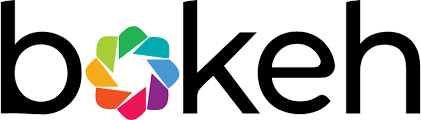  
This Jupyter notebook provide Bokeh plotting examples and a tutorial to get started. You can execute jupyter notebook from your Python terminal to try out the notebooks locally on your own machine.
Alternatively you can upload the jupyter notebook e.g. to colab.research.google.com and try it out in a cloud notebook sandbox

Note: Bokeh is a Python **interactive visualization library** for large datasets that natively uses the latest web technologies. Its goal is to provide elegant, concise construction of novel graphics in the style of Protovis/D3, while delivering high-performance interactivity over large data to thin clients.

---
Links/Source:  
+ [Bokeh web page](https://bokeh.org/) for more information and full documentation  
+ [Bokeh user guide](http://docs.bokeh.org/en/latest/docs/user_guide.html) a guide to all aspects of Bokeh  
+ [Bokeh reference guide](http://docs.bokeh.org/en/latest/docs/reference.html) a detailed reference of all Bokeh models and functions  
+ [Bokeh gallery](http://docs.bokeh.org/en/latest/docs/gallery.html) a collection of examples that show how to use Bokeh to create different kinds of plots   


+ [Presentation for Scipy 2023](https://cfp.scipy.org/2023/talk/C9QZXU/): A full tutorial was presented live during the SciPy 2023 conference. The current state of the repository, as presented, can be accessed through the designated git tag, available [here](https://github.com/bokeh/tutorial/releases/tag/SciPy2023). Additionally, the tutorial presentation is accessible on YouTube via the following link: https://youtu.be/G0Yc3ck4lC8?si=ZGqatTPnZBwjtdXO


---


Author:
*   dr.daniel benninger  

History:
*   v1, June    2021, dbe --- minor adaptions for CAS BIA11
*   v2, January 2022, dbe --- checks and minor corrections for CAS BIA12
*   v3, Febr    2024, dbe --- minor corrections for BINA FS24  

---

# Imports and Setup

When using the [`bokeh.plotting`](https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) interface, there are a few common imports:
* Use the [`figure`](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure) function to  create new plot objects to work with.
* Call the functions [`output_file`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_file) or [`output_notebook`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_notebook) (possibly in combination) to tell Bokeh how to display or save output.
* Execute [`show`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.show) and  [`save`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.save) to display or save plots and layouts.

In [3]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In this case, we are in the Jupyter notebook, so we will call `output_notebook()` below. We only need to call this once, and all subsequent calls to `show()` will display inline in the notebook.

In [21]:
output_notebook()

If everything is working, you should see a Bokeh logo and a message like *\"BokehJS 1.4.0 successfully loaded."* as the output.

This notebook uses Bokeh **sample data**. They can be downloaded by running the following:

In [ ]:
import bokeh.sampledata
bokeh.sampledata.download()

In [5]:
# create a complex chart with mouse-over tooltips

from bokeh.palettes import HighContrast3
from bokeh.plotting import figure, show

fruits = ["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"]
years = ["2015", "2016", "2017"]

data = {"fruits": fruits, "2015": [2, 1, 4, 3, 2, 4], "2016": [5, 3, 4, 2, 4, 6], "2017": [3, 2, 4, 4, 5, 3]}

p = figure(x_range=fruits, height=250, title="Fruit Counts by Year", toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(years, x="fruits", width=0.9, color=HighContrast3, source=data, legend_label=years)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

---  
# Basic Concepts

#### Bokeh components

Bokeh allows you to use Python to build interactive visualizations that run in a
web browser. To make this possible, Bokeh includes a JavaScript library called
BokehJS. BokehJS is responsible for rendering the visualizations in the browser.

When you create a visualization with Bokeh in Python, Bokeh converts this
visualization into a JSON file. This JSON file is then sent to BokehJS, and
BokehJS renders the visualization in the browser.

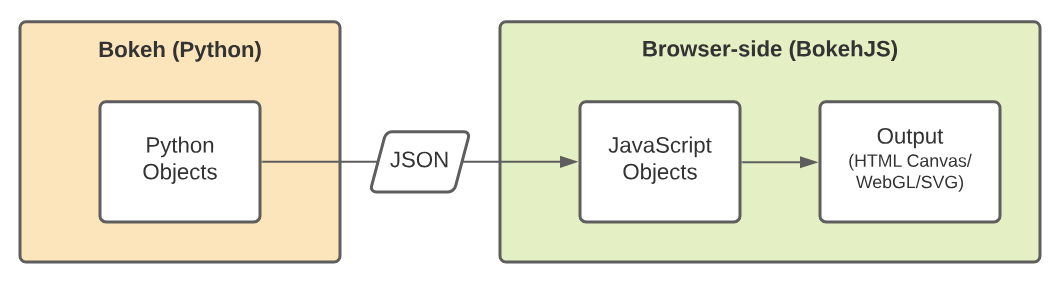



#### Bokeh Interfaces

You can interact with Bokeh using one of the following interface:

The high-level **bokeh.plotting** interface: This is Bokeh’s primary
interface. It is a general-purpose interface similar to the plotting
interfaces of libraries such as [Matplotlib](http://matplotlib.org/) or
[Matlab](http://www.mathworks.com/products/matlab/).  

The bokeh.plotting interface takes care of many aspects of your plot automatically. Therefore, it makes it
easy to get results from your data quickly.

#### Bokeh Building Blocks

On the most general level, all Bokeh visualizations are called **documents**.
A Bokeh document can contain lots of different elements. The most common
building blocks of a Bokeh document are:

##### **Plots**

The most common element in a Bokeh visualization is a plot. A plot is a
graphical representation of data. It consists of elements like glyphs, axes,
legends, and annotations:

In [14]:
from bokeh.plotting import figure, show

# generate some values
x = list(range(1, 50))
y = [pow(x, 2) for x in x]

# create a new plot
p = figure()
p = figure(height=300, width=300)

# add a line renderer and legend to the plot
p.line(x, y, legend_label="Temp.")

# show the results
show(p)

##### **Glyphs**

A glyph is a *visual representation of data*. In the example above, the line representing the x and y data is a line glyph.   

Bokeh supports many different kinds of glyphs to use inside of plots. Examples of glyphs include scatters, wedges, bars, or tiles.

##### **Widgets**

In addition to plots, you can also add widgets to your visualization. Widgets
are *interactive elements* that allow you to control or automate aspects of your
visualization.

The following example creates a slider widget for defining a date range:

In [8]:
from bokeh.models import DateRangeSlider

date_range_slider = DateRangeSlider(
    value=("2022-10-01", "2022-12-31"),
    start="2022-07-01",
    end="2023-03-31",
)

show(date_range_slider)

##### **Layouts**

A Bokeh document can consist of a single plot. However, you can also combine several plots and widgets into a more complex visualization. Combining multiple elements in one document is called a **layout**.   
Bokeh provides several different layout options to arrange your plots and widgets in a document.

For example:

In [11]:
from bokeh.layouts import row
from bokeh.plotting import figure, show

# prepare some data
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create three plots with one renderer each
s1 = figure(width=250, height=250, background_fill_color="#fafafa")
s1.scatter(x, y0, size=12, color="#53777a", alpha=0.8, marker="circle")

s2 = figure(width=250, height=250, background_fill_color="#fafafa")
s2.scatter(x, y1, size=12, color="#c02942", alpha=0.8, marker="triangle")

s3 = figure(width=250, height=250, background_fill_color="#fafafa")
s3.scatter(x, y2, size=12, color="#d95b43", alpha=0.8, marker="square")

# put the results in a row and show
show(row(s1, s2, s3))

---   
# Basic Plotting

## Scatter Plots

Bokeh can draw many types of visual shapes (called *glyphs*), including lines, bars, patches, hex tiles and more. One of the most common visualization tasks is to draw a scatter plot of data using small *marker* glyphs to represent each point.

In this section you will see how to use Bokeh's various marker glyphs to create simple scatter plots.

The basic outline is:
* create a blank figure: `p = figure(...)`
* call a glyph method such as `p.circle` on the figure
* `show` the figure

Execute the cell below to create a small scatter plot with circle glyphs:

In [13]:
# Modify the string for title below to change the title of the plot
plot = figure(title="Please change this title")
plot = figure(height=300, width=300)

plot.scatter([1, 2, 3], [6, 7, 4], size=10, marker="circle")
show(plot)

In the output above, you can see the effect of the different options for `line_color`, `fill_alpha`, etc. Try changing some of these values and re-executing the cell to update the plot.

All Bokeh scatter markers accept `size` (measured in screen space units) as a property. Circles in particular also have `radius` (measured in "data" space units).

To scatter square markers instead of circles, you can use the `square` method on figures.

In [12]:
# create a new plot using figure
plot = figure(title="New plot using another method on figures")
plot = figure(height=300, width=300)

# add a square renderer with a size, color, alpha, and sizes
plot.square([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=[10, 15, 20, 25, 30], color="firebrick", alpha=0.6)

show(plot) # show the results

Note that in the example above, we are also specifying different sizes for each individual marker. In general, all of a glyph's properties can be "vectorized" in this fashion.  Also note that we have passed ``color`` as a shorthand to set both the line and fill colors easily at the same time. This is a convenience specific to ``bokeh.plotting``.

There are many marker types available in Bokeh, you can see details and
example plots for all of them in the [reference guide, section glyphs](https://docs.bokeh.org/en/latest/docs/reference/models/glyphs.html)


### **EXERCISE: Make a scatter plot using the "autompg" dataset**

In [16]:
from bokeh.sampledata.autompg import autompg as df

df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
# create a new plot using figure
plot = figure(title="Automotives: Miles per Gallons vs Weight [Scatter Plot]")
plot = figure(height=500, width=500)

# add a square renderer with a size, color, alpha, and sizes
plot.scatter(df["mpg"], df["weight"], size=df["cyl"], color="firebrick", alpha=0.6)

show(plot) # show the results

## Line Plots

Another common visualization task is the drawing of line plots. This can be accomplished in Bokeh by calling the `p.line(...)` glyph method as shown below.

In [18]:
# create a new plot (with a title) using figure
plot = figure(title="My First Line Plot")
plot = figure(height=300, width=300)

# add a line renderer
plot.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(plot) # show the results

In addition to `line_width`, there are other options such as `line_color` or `line_dash` that can be set. Try setting some of the [other properties of line](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.line) and re-running the cell above.

### Datetime axes

It's often the case that timeseries data is represented by drawing lines. Let's look at an example using the "glucose" data set, which is available in a Pandas dataframe:

In [23]:
from bokeh.sampledata.glucose import data
data.head()

,isig,glucose
datetime,,
2010-03-24 09:51:00,22.59,258
2010-03-24 09:56:00,22.52,260
2010-03-24 10:01:00,22.23,258
2010-03-24 10:06:00,21.56,254
2010-03-24 10:11:00,20.79,246


We'd like to plot a subset of this data, and have a nice datetime axis as well. We can ask Bokeh for a datetime axis by passing `x_axis_type="datetime"` to the call to `figure`. This is shown below, as well as configuration of a some other options such as plot dimensions, axis titles, and grid line properies.

In [29]:
# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']

plot = figure(x_axis_type="datetime", title="Glocose Range")
plot = figure(height=400, width=1200)

plot.xgrid.grid_line_color=None
plot.ygrid.grid_line_alpha=0.5

plot.xaxis.axis_label = 'Time'
plot.yaxis.axis_label = 'Value'

plot.line(week.index, week.glucose)

show(plot)

## Bar Charts

Bar charts represent data for different categories of categorical data as vertical or horizontal
bars.

In the examples so far, you have used a continuous range for the x-axis.
Bar charts are a great way to visualize categorical data.
This means that the x-axis is not a continuous range but a set of discrete categories.
For example, a list of countries or a list of different products.

In the example below, you will create a bar chart that shows a count for
different kinds of fruits.

The different fruits are the categories.
To use categories instead of a continuous range of numbers, the `figure()` function
has a parameter called `x_range`.
This is where you pass the list of fruits.

The glyph function for vertical bars is called `vbar()`.
The height of the bars is determined by the `top` parameter.
The `x` parameter determines which category the bar belongs to.

In [52]:
fruits = ["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"]  # a list of categories
counts = [5, 3, 4, 2, 4, 6]

plot = figure(x_range=fruits, height=300, width=1000, title="Fruit Counts")  # define the categories on the x-axis

plot.vbar(x=fruits, top=counts, width=0.5, color="steelblue")

show(plot)

## Pie Charts  

For more information on pie charts, see [Pie chart](https://docs.bokeh.org/en/latest/docs/user_guide/topics/pie.html#pie-chart)
in the user guide.  

Let's create a pie chart representing the shares of pizza toppings ordered at a pizza place in one day.   
First, *create a DataFrame* with the number of orders for each topping:

In [ ]:
import pandas as pd

pizza_df = pd.DataFrame(
    {
        "topping": ["Pepperoni", "Cheese", "Mixed Veggies", "Bacon"],  # the four available toppings
        "orders": [221, 212, 152, 72],  # the number of orders for each topping
        "color": ["red", "darkorange", "darkgreen", "hotpink"],  # define colors for each topping
    }
)
pizza_df

Next, calculate the angle for each slice/wedge (in radians):

In [ ]:
from math import pi

pizza_df["angle"] = pizza_df["orders"] / pizza_df["orders"].sum() * 2 * pi
pizza_df

Then, convert the DataFrame to a ColumnDataSource and visualize the data:

In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.transform import cumsum

# create a ColumnDataSource from the DataFrame
pizza_data = ColumnDataSource(pizza_df)

# set up the figure
pizza_plot = figure(
    height=400,
    toolbar_location=None,                # deactivate the toolbar
    tooltips="@topping: @orders orders",  # configure tooltips to use the "topping" and "orders" columns
    x_range=(-1.0, 1.0),
    background_fill_color="#bcbcbc",      # set the background color to a light gray
)

# define the pie chart
pizza_plot.wedge(
    x=0,                                  # x coordinate of the center of the pie chart
    y=1,                                  # y coordinate of the center of the pie chart
    radius=0.5,                           # radius of the pie chart
    start_angle=cumsum("angle", include_zero=True),
    end_angle=cumsum("angle"),
    line_color="#94541e",                 # approximate the color of a pizza crust
    line_width=3,
    fill_color="color",                   # color each wedge based on the "color" column
    legend_field="topping",               # use the "topping" column as legend entries
    source=pizza_data,                    # use the ColumnDataSource as the source
)

pizza_plot.axis.visible = False              # deactivate the axes
pizza_plot.grid.grid_line_color = None       # deactivate the grid lines
pizza_plot.legend.background_fill_alpha = 0  # make the legend background transparent

show(pizza_plot)

In [77]:
# set up a figure covering North America
p = figure(
    x_range=(-14000000, -6000000),  # x range bounds supplied in Web Mercator coordinates
    y_range=(2000000, 4000000),  # y range bounds supplied in Web Mercator coordinates
    x_axis_type="mercator",  # set the x-axis to use Web Mercator coordinates
    y_axis_type="mercator",  # set the y-axis to use Web Mercator coordinates
    tools="pan, wheel_zoom, reset",  # configure the toolbar for zooming and panning
    active_scroll="wheel_zoom",
)

# add a circle glyph to represent the UN headquarters
p.scatter(
    x="x",  # use the "x" column from the GeoJSONDataSource
    y="y",  # use the "y" column from the GeoJSONDataSource
    fill_color="#5B92E5",
    line_color="white",
    size=25,
    fill_alpha=0.8,
    source=geo_source,  # use the GeoJSONDataSource as the source
)

# add a tile source for the base map
p.add_tile("Esri World Imagery", retina=True)

show(p)

# Use the pan and wheel zoom tools to navigate around the map.
# You can see where exactly the UN headquarters is located!

---   
# Map Plots  

Bokeh has several functionalities built-in that you can use to visualize data in a two-dimensional space or even geographical data on maps.

## Hex Tiling

Bokeh supports drawing low level hex tilings using [axial coordinates](https://www.redblobgames.com/grids/hexagons/#coordinates-axial) and the `hex_tile` method, as described in the [Hex Tiles](https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html#hex-tiles) section of the User's Guide.  However, one of the most common uses of hex tilings is to visualize binning. Bokeh encapsulates this common operation in the `hexbin` function, whose output can be passed directly to `hex_tile` as seen below.   

See [Hex Color Palettes](https://www.color-hex.com/color-palettes/) for an overview of HEX or RGB color codes

In [62]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

# generate datapoints in standard normal distribution
n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

# color map the bins by hand, will see how to use linear_cmap later
color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

# match_aspect ensures neither dimension is squished, regardless of the plot size
plot = figure(title="Hex Tiling Example")
plot = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#6fa8dc')
plot.grid.visible = False

plot.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

show(plot)

## Geo Maps

Bokeh works with multiple tile providers that support Web Mercator projection.

Bokeh uses the [xyzservices](https://xyzservices.readthedocs.org/) library to manage map tile providers.

This way, you can use popular map designs from providers such as OpenStreetMap, CartoDB, and Esri.

In order to use tiles in a plot, you first need to configure your plot. This is done
with the `figure()` function:
* The `x_range` and `y_range` parameters need to be defined in Web Mercator coordinates.
* The `x_axis_type` and `y_axis_type` parameters need to be set to `mercator`.

After configuring your plot, use the `add_tile()` function to add the map tiles to a plot.
This function requires the name of a tile source as a parameter.

This works similarly to adding a line render with `line()`, or adding bars with
`vbar()`:

In [69]:
import xyzservices.providers as xyz

from bokeh.plotting import figure, show

# range bounds supplied in Web Mercator coordinates
map = figure(x_range=(-2000000, 6000000), y_range=(4000000, 7000000), x_axis_type="mercator", y_axis_type="mercator")

# Exercise: try uncommenting different lines to see different tile providers
#map.add_tile("CartoDB Positron", retina=True)
#map.add_tile("Esri World Imagery", retina=True)
map.add_tile("OSM", retina=True)

show(map)

To navigate around the map, use the standard Bokeh tools, such as the box zoom or wheel
zoom!

For more information on adding tiles to a plot, see the following resources:
* [Tile provider maps](https://docs.bokeh.org/en/latest/docs/user_guide/topics/geo.html#tile-provider-maps)
in the user guide
* [Documentation for `add_tile`](https://docs.bokeh.org/en/latest/docs/reference/plotting/figure.html#bokeh.plotting.figure.add_tile)
  in the reference guide.
* the [tile_demo](https://docs.bokeh.org/en/latest/docs/examples/topics/geo/tile_demo.html)
  example in the Bokeh gallery

## Google Maps

Bokeh also supports Google Maps tiles. **Note**: To use Google Maps tiles, you need to provide an *API key*.

This makes it difficult to demonstrate Google Maps for the purpose of this tutorial.   

See
[Google Maps](https://docs.bokeh.org/en/latest/docs/user_guide/topics/geo.html#google-maps)
in the user guide for more information.

## GeoJSON

To process data with geo information, Bokeh includes the GeoJSONDataSource.
You can use [GeoJSON](https://geojson.org/) data such as points, lines, and polygons (called Patches in Bokeh) together with other data from a ColumnDataSource.

To demonstrate this, let's create a small GeoJSON.  
It contains the location of the UN
headquarters as a single point (40.749444, -73.968056, according to [Wikipedia](https://geohack.toolforge.org/geohack.php?pagename=Headquarters_of_the_United_Nations&params=40_44_58_N_73_58_5_W_type:landmark)):

In [73]:
# first install geojson library in the colab notebook environment
!pip install geojson

In [74]:
from shapely.geometry import Point
from pyproj import CRS, Transformer
import geojson

# Create a Point geometry for the UN headquarters (located at 40.748817, -73.968285)
un_location = Point(-73.968285, 40.748817)

# Create a GeoJSON feature using the Point geometry
un_feature = geojson.Feature(geometry=un_location, properties={"name": "United Nations headquarters"})

# Create a GeoJSON FeatureCollection containing the feature
un_feature_collection = geojson.FeatureCollection([un_feature])

# Print the FeatureCollection as GeoJSON string
geojson.dumps(un_feature_collection)

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Point", "coordinates": [-73.968285, 40.748817]}, "properties": {"name": "United Nations headquarters"}}]}'

Bokeh uses the **Web Mercator projection** for map plots.  

Therefore, you need to convert the GeoJSON to the Web Mercator projection.  
This example uses *geopandas* to do this:

In [75]:
import geopandas as gpd

gdf = gpd.GeoDataFrame.from_features(un_feature_collection, crs="EPSG:4326")
un_web_mercator = gdf.to_crs(epsg=3857).to_json()
un_web_mercator

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"name": "United Nations headquarters"}, "geometry": {"type": "Point", "coordinates": [-8234111.8210517345, 4975362.528079467]}}], "crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:EPSG::3857"}}}'

Now, we can use the GeoJSON to create a GeoJSONDataSource:

In [76]:
from bokeh.models import GeoJSONDataSource

geo_source = GeoJSONDataSource(geojson=un_web_mercator)

When converting the GeoJSON to a GeoJSONDataSource, Bokeh automatically detects the
geometry. The GeoJSONDataSource contains two special columns:

* `x` and `y` for points
* `xs` and `ys` for lines and polygons

Bokeh creates those columns for you, based on the GeoJSON geometry.

You can use the GeoJSONDataSource to draw the point on a plot. This works just like
drawing glyphs from a ColumnDataSource:

---   
# Images

Another common task is to display images, which might represent **heat maps**, or sensor data of some sort.   

Bokeh provides two glyph methods for displaying images:
* `image` which can be used, together with a palette, to show colormapped 2d data in a plot
* `image_rgba` which can be used to display raw RGBA pixel data in a plot.

The example below shows how to call `image` with a 2d array and a palette

In [ ]:
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)

img = np.sin(xx)*np.cos(yy)

plot = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
plot.image(image=[img], x=0, y=0, dw=10, dh=10, palette="Spectral11")

show(plot)

A palette can be any list of colors, or one of the named built-in palettes, which can be seen in the [bokeh.palettes reference guide](https://bokeh.pydata.org/en/latest/docs/reference/palettes.html). Try changing the palette, or the array data and re-running the cell above.

# Interactions: URLs and Interactive Legends

Bokeh allows you to define complex interactions with custom JavaScript callback code. However, there are also several **simple interaction types** that you can use without writing any JavaScript.

In this section, you will learn how to use the following interaction types:
*  **OpenURL**: You can define URLs that are opened when a user clicks on a glyph.
* **Interactive legends**:
  You can make your legend clickable. This will mute or hide the corresponding glyphs.

#### OpenURL

The `OpenURL` class allows you to **define URLs that are opened when a user clicks on a glyph**.

Let's create a DataFrame with population data for the world's five largest countries. This DataFrame also includes a Wikipedia URL for each country:

In [ ]:
import pandas as pd

population_df = pd.DataFrame(
    {
        "country": ["China", "India", "USA", "Indonesia", "Pakistan"],
        "population": [1412600000, 1375586000, 333340028, 275773800, 235825000],
        "wikipedia_url": ["https://en.wikipedia.org/wiki/China", "https://en.wikipedia.org/wiki/India", "https://en.wikipedia.org/wiki/United_States", "https://en.wikipedia.org/wiki/Indonesia", "https://en.wikipedia.org/wiki/Pakistan"],
    }
)
population_df

Create a bar chart with the population data. Each bar is clickable and opens
the corresponding Wikipedia page.

This code uses the `OpenURL` class to define the URL that is opened when a user
clicks on a bar.

The `OpenURL` class takes a `url` parameter that defines the URL
template. The template can contain placeholders that are replaced with the values
of the data source columns. In this example, the `@wikipedia_url` placeholder is
replaced with the value of the `wikipedia_url` column in the DataFrame.

To make the bars clickable, you also need to have the tap tool enabled. This is
done by adding `"tap"` to the `tools` parameter of the `figure()` function.

In [95]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, OpenURL, TapTool, ColumnDataSource

plot = figure(
    x_range=population_df["country"],
    height=350,
    title="Most populous countries",
    tools="tap",                      # enable the tap tool to make the bars clickable
)

plot.vbar(x="country", top="population", width=0.9, source=population_df)
plot.yaxis.formatter = NumeralTickFormatter(format="0,0")


# Configure the OpenURL as the tap tool's callback
url = "@wikipedia_url"               # use the URLs stored in the wikipedia_url column
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)  # define the OpenURL object as the tap tool's callback

show(plot)

---   
## Interactive Legends (Muting and Hiding Glyphs)

Bokeh also includes a quick way to make a **legend clickable**. This allows you to mute or hide the corresponding glyphs.

To make a legend clickable, use the legend's `click_policy` parameter. This parameter can have the following values:

* **`mute`**: This mutes the corresponding glyphs. This means that the glyphs are still visible, but they are grayed out.
* **`hide`**: This hides the corresponding glyphs. This means that the glyphs are not visible anymore.
* **`none`**: The legend is not clickable. This is the default value.

This example uses the [sampledata that comes with Bokeh](https://docs.bokeh.org/en/latest/docs/reference/sampledata.html#bokeh-sampledata).
You can download it with the following code:

In [ ]:
import bokeh.sampledata

bokeh.sampledata.download()

In the code cell below, change the `click_policy` parameter from `"mute"` to `"hide"`.   

Rerun the cell and try the different behaviors.

In [101]:
import pandas as pd

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

plot = figure(width=800, height=250, x_axis_type="datetime")
plot.title.text = "Click on legend entries to hide the corresponding lines"

for stocks, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(stocks)
    df["date"] = pd.to_datetime(df["date"])
    plot.line(df["date"], df["close"], line_width=2, color=color, alpha=0.8, legend_label=name)

plot.legend.location = "top_left"
plot.legend.click_policy = "hide"  # >>> change to "mute" to mute the lines instead of hiding them

show(plot)